**Description**: Analyze Mistral-7B zero-shot accuracies for $n = 100$.

**Estimated runtime**: 30 min.

In [1]:
import os
from typing import Literal

import polars as pl
import seaborn as sns

import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("accuracies_zero_shot")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
accuracy_df.shape

(500, 8)

In [6]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

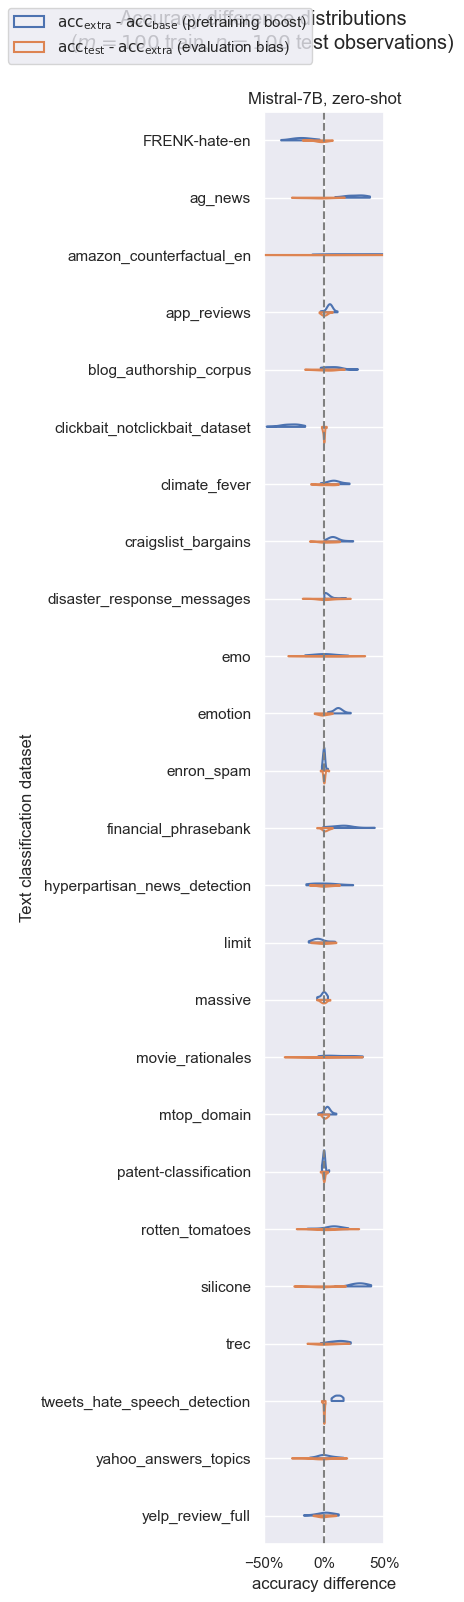

In [7]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train);

# Control

In [8]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.05252 ┆ 0.024713 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.300832 ┆ 0.132237 │
└──────────┴──────────┘


In [9]:
with pl.Config(tbl_rows=-1):
    print(summary_control)

┌────────────────────────────────┬─────────┬──────────┐
│ dataset                        ┆ mean    ┆ se       │
╞════════════════════════════════╪═════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.1835 ┆ 0.018242 │
│ ag_news                        ┆ 0.258   ┆ 0.017927 │
│ amazon_counterfactual_en       ┆ 0.266   ┆ 0.050676 │
│ app_reviews                    ┆ 0.0435  ┆ 0.006699 │
│ blog_authorship_corpus         ┆ 0.0635  ┆ 0.017325 │
│ clickbait_notclickbait_dataset ┆ -0.284  ┆ 0.017672 │
│ climate_fever                  ┆ 0.0805  ┆ 0.013659 │
│ craigslist_bargains            ┆ 0.085   ┆ 0.012129 │
│ disaster_response_messages     ┆ 0.0285  ┆ 0.012059 │
│ emo                            ┆ 0.004   ┆ 0.021733 │
│ emotion                        ┆ 0.1145  ┆ 0.009665 │
│ enron_spam                     ┆ -0.0015 ┆ 0.002325 │
│ financial_phrasebank           ┆ 0.1445  ┆ 0.021963 │
│ hyperpartisan_news_detection   ┆ 0.0     ┆ 0.023124 │
│ limit                          ┆ -0.0385 ┆ 0.0

In [10]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_control)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.251598 ┆ 0.023442 │
│ ag_news                        ┆ 0.497903  ┆ 0.040516 │
│ amazon_counterfactual_en       ┆ 0.859316  ┆ 0.16823  │
│ app_reviews                    ┆ 0.0717    ┆ 0.011644 │
│ blog_authorship_corpus         ┆ 0.133513  ┆ 0.039791 │
│ clickbait_notclickbait_dataset ┆ -0.427017 ┆ 0.020319 │
│ climate_fever                  ┆ 0.533828  ┆ 0.10643  │
│ craigslist_bargains            ┆ 0.122965  ┆ 0.020857 │
│ disaster_response_messages     ┆ 0.337348  ┆ 0.160989 │
│ emo                            ┆ 0.012508  ┆ 0.039406 │
│ emotion                        ┆ 0.308598  ┆ 0.028414 │
│ enron_spam                     ┆ -0.002942 ┆ 0.004227 │
│ financial_phrasebank           ┆ 0.282829  ┆ 0.051655 │
│ hyperpartisan_news_detection   ┆ 0.015865  ┆ 0.047483 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 139 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 1 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[extra],0.26357,0.01434,0.24061,0.2854,0.00014,0.0001,10376.57705,2780.54802,1.00029


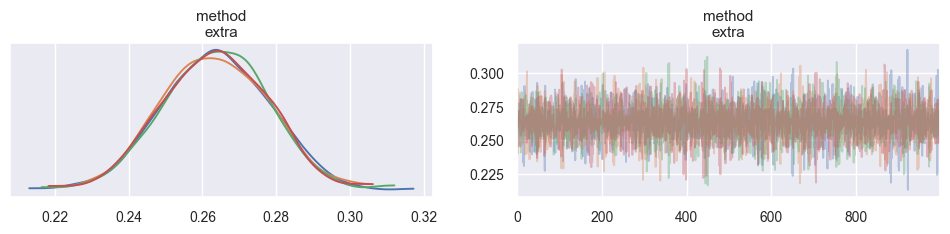

In [11]:
model_control, summary_control, az_summary_control = utils.stat_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [12]:
print(model_control)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Treatment

In [13]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ -0.00044 ┆ 0.004023 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.036866 ┆ 0.019568 │
└──────────┴──────────┘


In [14]:
with pl.Config(tbl_rows=-1):
    print(summary_bias)

┌────────────────────────────────┬─────────────┬──────────┐
│ dataset                        ┆ mean        ┆ se       │
╞════════════════════════════════╪═════════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.0255     ┆ 0.012596 │
│ ag_news                        ┆ -0.0555     ┆ 0.025644 │
│ amazon_counterfactual_en       ┆ -0.026      ┆ 0.076411 │
│ app_reviews                    ┆ 0.0045      ┆ 0.005642 │
│ blog_authorship_corpus         ┆ 0.0075      ┆ 0.017931 │
│ clickbait_notclickbait_dataset ┆ -0.002      ┆ 0.001717 │
│ climate_fever                  ┆ 0.015       ┆ 0.015803 │
│ craigslist_bargains            ┆ 0.0305      ┆ 0.014876 │
│ disaster_response_messages     ┆ 0.026       ┆ 0.019213 │
│ emo                            ┆ 0.0305      ┆ 0.041087 │
│ emotion                        ┆ -0.008      ┆ 0.008633 │
│ enron_spam                     ┆ -2.7756e-18 ┆ 0.002616 │
│ financial_phrasebank           ┆ 0.012       ┆ 0.006391 │
│ hyperpartisan_news_detection   ┆ 0.005

In [15]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_bias)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.040048 ┆ 0.020798 │
│ ag_news                        ┆ -0.064952 ┆ 0.034442 │
│ amazon_counterfactual_en       ┆ 0.153956  ┆ 0.187355 │
│ app_reviews                    ┆ 0.006456  ┆ 0.008522 │
│ blog_authorship_corpus         ┆ 0.019368  ┆ 0.030214 │
│ clickbait_notclickbait_dataset ┆ -0.006327 ┆ 0.005195 │
│ climate_fever                  ┆ 0.090481  ┆ 0.067721 │
│ craigslist_bargains            ┆ 0.040275  ┆ 0.018525 │
│ disaster_response_messages     ┆ 0.413586  ┆ 0.207271 │
│ emo                            ┆ 0.098027  ┆ 0.078203 │
│ emotion                        ┆ -0.014089 ┆ 0.0173   │
│ enron_spam                     ┆ 0.001101  ┆ 0.00525  │
│ financial_phrasebank           ┆ 0.018389  ┆ 0.009442 │
│ hyperpartisan_news_detection   ┆ 0.018039  ┆ 0.026346 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 140 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


Sampling posterior predictive. This will take at least 30 min. Maybe 1 hrs for this size data


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
method[test],-0.00186,0.01401,-0.02452,0.02007,0.00015,0.0003,8379.96117,2540.04198,1.00065


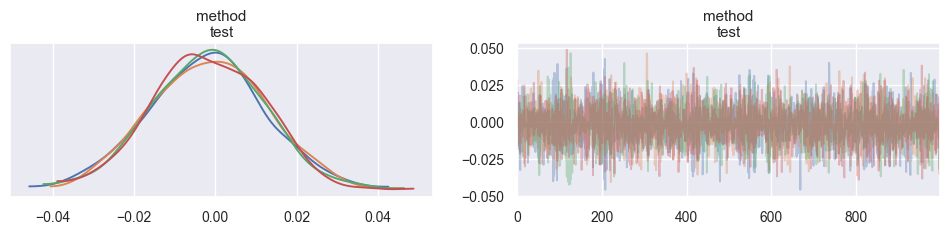

In [16]:
model_bias, summary_bias, az_summary_bias = utils.stat_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [17]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [19]:
netcdfs = os.path.join("netcdfs", "zero-shot", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [20]:
summary_control.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
)

'netcdfs/zero-shot/m100/main_m100_n100_control.nc'

In [21]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
)

'netcdfs/zero-shot/m100/main_m100_n100_treatment.nc'